## 2D nonlinear convection
$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = 0\\
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = 0
$$

Finite diffrence:
$$
\frac{u^{n+1}_{i,j}-u^{n}_{i,j}}{\Delta t} + u^{n}_{i,j}\frac{u^{n}_{i,j}-u^{n}_{i-1,j}}{\Delta x} + v^{n}_{i,j}\frac{u^{n}_{i,j}-u^{n}_{i,j-1}}{\Delta y} = 0\\
\frac{v^{n+1}_{i,j}-v^{n}_{i,j}}{\Delta t} + u^{n}_{i,j}\frac{v^{n}_{i,j}-v^{n}_{i-1,j}}{\Delta x} + v^{n}_{i,j}\frac{v^{n}_{i,j}-v^{n}_{i,j-1}}{\Delta y} = 0
$$
where u is velocity direction x and v is velocity direction y 

$u^{n+1}_{i,j}$ , $v^{n+1}_{i,j}$ as subject:
$$
u^{n+1}_{i,j} = u^{n}_{i,j} + \Delta t(-u^{n}_{i,j}\frac{u^{n}_{i,j}-u^{n}_{i-1,j}}{\Delta x} - v^{n}_{i,j}\frac{u^{n}_{i,j}-u^{n}_{i,j-1}}{\Delta y})\\
v^{n+1}_{i,j} = v^{n}_{i,j}+\Delta t(-u^{n}_{i,j}\frac{v^{n}_{i,j}-v^{n}_{i-1,j}}{\Delta x} - v^{n}_{i,j}\frac{v^{n}_{i,j}-v^{n}_{i,j-1}}{\Delta y})
$$

IC:

$u(x,y) =  2$ at $x,y = x,y$ and 1 elsewhere

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

0.005


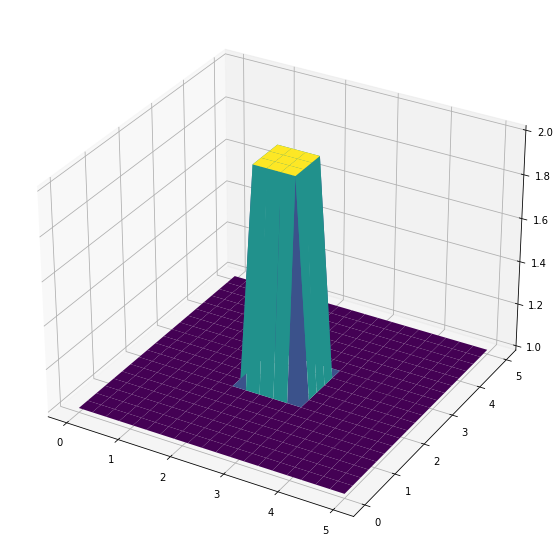

In [65]:
# contants 
x_max = 5
y_max = 5
nx = 20
ny = 20
dx = x_max / (nx)
dy = y_max / (ny)
T = 1
nt = 200
dt = T / nt
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)


#init 
u_init = np.zeros((ny, nx))
u_init[:] = 1 
u_init[int(2/dy):int(3/dy), int(2/dx):int(3/dx)] = 2

v_init = np.zeros((ny, nx))
v_init[:] = 1 
v_init[int(2/dy):int(3/dy), int(2/dx):int(3/dx)] = 2

u0 = u_init.copy()

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0, cmap=cm.viridis)

print(dt)

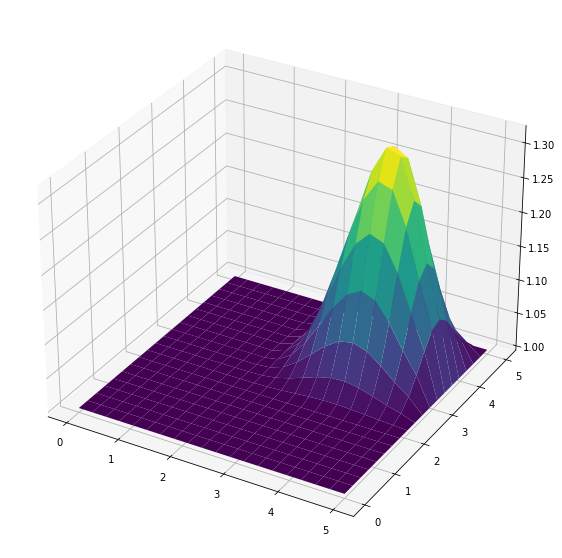

In [72]:
# init 
u0 = u_init.copy()
v0 = v_init.copy()

# finite difference
for _ in range(nt):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i, j] = (u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]))
            v0[i, j] = (v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]))

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0, cmap=cm.viridis)

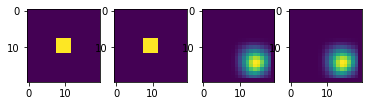

In [79]:
# init 
u0 = u_init.copy()
v0 = v_init.copy()

for _ in range(nt):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i, j] = (u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]))
            v0[i, j] = (v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]))

plt.subplot(1,4,1)
plt.imshow(u_init)
plt.subplot(1,4,2)
plt.imshow(v_init)
plt.subplot(1,4,3)
plt.imshow(u0)
plt.subplot(1,4,4)
plt.imshow(v0)


MovieWriter ffmpeg unavailable; using Pillow instead.


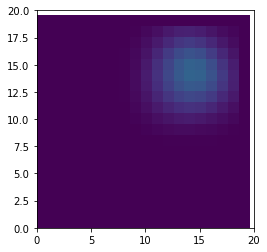

In [82]:
# animate 
# init 
u0 = u_init.copy()
v0 = v_init.copy()

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, nx), ylim=(0, ny))
line = plt.imshow(u0)

def animate(frames):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i, j] = (u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]))
            v0[i, j] = (v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]))

    line.set_data(u)
    return line

anim = animation.FuncAnimation(fig, animate, frames=nt, repeat=True)
anim.save('2d PAIN convection.gif', fps = 20)
    

MovieWriter ffmpeg unavailable; using Pillow instead.


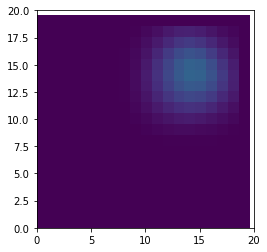

In [83]:
# animate 
# init 
u0 = u_init.copy()
v0 = v_init.copy()

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, nx), ylim=(0, ny))
line = plt.imshow(u0)

def animate(frames):
    u = u0.copy()
    v = v0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i, j] = (u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]))
            v0[i, j] = (v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]))

    line.set_data(v)
    return line

anim = animation.FuncAnimation(fig, animate, frames=nt, repeat=True)
anim.save('2d PAINx2 convection.gif', fps = 20)